**2.3 Rotaions in 3D**



벡터 P를 축 V(단위벡터)를 중심으로 $\theta$ 만큼 돌리는 변환

$$ \bf p' = R \bf p $$


R : 3X3 회전 행렬, p: 원래 벡터 , p': 회전된 벡터

## 3D 회전: 축을 기준으로 한 회전 행렬 시각화

주어진 단위 벡터 $ \vec{w} $를 축으로 하는 $\theta $ -회전을 정의하고, 이를 시각화해볼 것이다.

**회전 개념** 

단위 벡터 $ \vec{w} $를 축으로 하여 3D 공간에서 회전할 때, 다음과 같은 정규 직교 기저 $\vec{u}, \vec{v}, \vec{w}$를 설정한다.


$\vec{u} \times \vec{v} = \vec{w}, \quad
\vec{v} \times \vec{w} = \vec{u}, \quad
\vec{w} \times \vec{u} = \vec{v}$


이 때, 회전 변환은 이러하다.


$\begin{cases}
\vec{u} \mapsto \cos\theta \vec{u} + \sin\theta \vec{v} \\
\vec{v} \mapsto -\sin\theta \vec{u} + \cos\theta \vec{v} \\
\vec{w} \mapsto \vec{w}
\end{cases}$


회전 행렬은 다음과 같이 정의된다:

$R_{\vec{w}}(\theta) = B \cdot R_{uv}(\theta) \cdot B^T$


여기서 \($ B = [\vec{u} \; \vec{v} \; \vec{w}] $\)
, 그리고


$R_{uv}(\theta) =
\begin{bmatrix}
\cos\theta & -\sin\theta & 0 \\
\sin\theta & \cos\theta & 0 \\
0 & 0 & 1
\end{bmatrix}$


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [32]:
def rotation_matrix_about_axis(u, v, w, theta):
    R_uv = np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta),  np.cos(theta), 0],
        [0,              0,             1]
    ])
    B = np.column_stack((u, v, w))
    return B @ R_uv @ B.T

In [33]:
# 단위 축 정의
w = np.array([0, 0, 1])
u = np.array([1, 0, 0])
v = np.cross(w, u)

# 회전 각도
theta = np.pi / 4

# 회전 행렬 생성
R = rotation_matrix_about_axis(u, v, w, theta)

# 예제 벡터와 회전 결과
x0 = np.array([1, 1, 0])
x_rotated = R @ x0

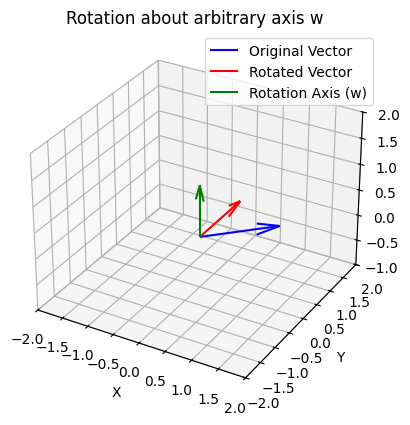

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
origin = np.zeros(3)

ax.quiver(*origin, *x0, color='blue', label='Original Vector')
ax.quiver(*origin, *x_rotated, color='red', label='Rotated Vector')
ax.quiver(*origin, *w, color='green', label='Rotation Axis (w)')

ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_zlim([-1, 2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.title('Rotation about arbitrary axis w')
plt.show()

# Rodrigues' Rotation Formula

회전 행렬 $R_{\vec{w}}(\theta)$ 는 직교기저 없이 벡터  $\vec{w}$ 와 각도 $\theta$ 만으로 표현할 수 있다.

*벡터 내적 표현*
Let $\vec{a}, \vec{b} \in \mathbb{R}^n$ . Then


$\vec{a} \cdot \vec{b} = \vec{b}^T \vec{a} = \vec{a}^T \vec{b}$


*외적을 행렬로 표현: Skew-Symmetric Matrix*

Let $\vec{w} = (w_1, w_2, w_3)^T \in \mathbb{R}^3$ , then


$\Lambda(\vec{w}) =
\begin{bmatrix}
0 & -w_3 & w_2 \\
w_3 & 0 & -w_1 \\
-w_2 & w_1 & 0
\end{bmatrix}$


## Rodrigues' 회전 공식


$\begin{aligned}
R_{\vec{w}}(\theta)\vec{x} &= (\vec{x} \cdot \vec{w})\vec{w} + \left[\vec{x} - (\vec{x} \cdot \vec{w})\vec{w}\right] \cos\theta + (\vec{w} \times \vec{x}) \sin\theta \\
R_{\vec{w}}(\theta) &= \vec{w}\vec{w}^T + (I - \vec{w}\vec{w}^T)\cos\theta + \Lambda(\vec{w}) \sin\theta
\end{aligned}$



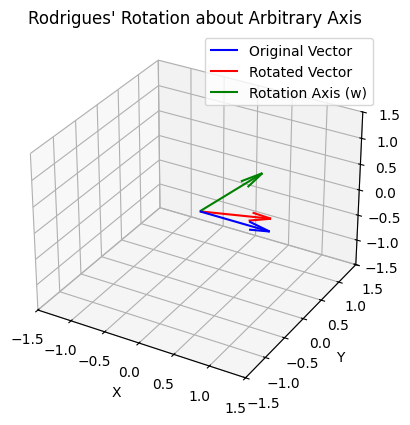

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def skew(w):
    """Skew-symmetric matrix for cross product with w"""
    return np.array([
        [0, -w[2], w[1]],
        [w[2], 0, -w[0]],
        [-w[1], w[0], 0]
    ])

def rodrigues_rotation_matrix(w, theta):
    """Rodrigues' rotation matrix from axis w (unit vector) and angle theta"""
    w = w / np.linalg.norm(w)
    W = skew(w)
    I = np.eye(3)
    return w[:, None] @ w[None, :] + (I - w[:, None] @ w[None, :]) * np.cos(theta) + W * np.sin(theta)
# Rotation axis and angle
w = np.array([1, 1, 1])
w = w / np.linalg.norm(w)
theta = np.pi / 3  # 60 degrees

# Vector to rotate
x = np.array([1, 0, 0])

# Rotate using Rodrigues' formula
R = rodrigues_rotation_matrix(w, theta)
x_rot = R @ x

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
origin = np.zeros(3)

ax.quiver(*origin, *x, color='blue', label='Original Vector')
ax.quiver(*origin, *x_rot, color='red', label='Rotated Vector')
ax.quiver(*origin, *w, color='green', label='Rotation Axis (w)')

ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.set_zlim([-1.5, 1.5])
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()
plt.title("Rodrigues' Rotation about Arbitrary Axis")
plt.show()


+ Add 3D rotation explanation using quaternion
While studying 3D rotation, found that quaternion offers a more robust and intuitive way to represent rotations

 ## 쿼터니언으로 3D 회전


회전 축: 단위벡터 $ v= [v_x,v_y,v_z] $
회전 각도: $\theta$

$$ q=\cos(θ/2)+\sin(θ/2)⋅(vx⋅i+vy⋅j+vz⋅k) $$

$q = [w,x,y,z]$

$p' =q⋅p⋅q^−1 $

회전 전 벡터: [1 0 0]
회전 후 벡터: [ 0.5        0.        -0.8660254]


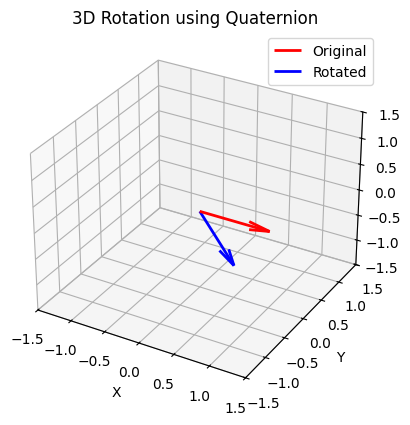

In [36]:
import numpy as np
from scipy.spatial.transform import Rotation as R

# 1. 회전축과 각도 정의
axis = np.array([0, 1, 0])         # y축 회전
angle = np.pi / 3                  # 60도 회전

# 2. 쿼터니언 생성
rot = R.from_rotvec(angle * axis)  # 쿼터니언 생성 (axis-angle)

# 3. 회전할 벡터
v = np.array([1, 0, 0])            # x축 방향 벡터

# 4. 회전 적용
v_rot = rot.apply(v)

print("회전 전 벡터:", v)
print("회전 후 벡터:", v_rot)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 원점
origin = [0, 0, 0]

# 화살표 그리기
ax.quiver(*origin, *v, color='r', label='Original', linewidth=2)
ax.quiver(*origin, *v_rot, color='b', label='Rotated', linewidth=2)

# 설정
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.set_zlim([-1.5, 1.5])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
ax.set_title('3D Rotation using Quaternion')

plt.show()
